# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [3]:
harold_portfolio_path = Path("harold_portfolio.csv")
my_portfolio_path = Path("my_portfolio.csv")
risk_free_rate_path = Path("risk_free_rate.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)
risk_free_rate = pd.read_csv(risk_free_rate_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()
risk_free_rate = risk_free_rate.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')
risk_free_rate = risk_free_rate.set_index('Date')

harold_portfolio.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_40873/3103022131.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_40873/3103022131.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_40873/3103022131.py:8: FutureWarning: The argument 

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


### Calculate daily returns 

In [4]:
harold_daily_returns = harold_portfolio.pct_change()
my_portfolio_daily_returns = my_portfolio.pct_change()
# daily_returns.head()

### `Concat` portfolios into one DataFrame

In [5]:
joined_portfolios = pd.concat([harold_daily_returns, my_portfolio_daily_returns, risk_free_rate], axis='columns', join='inner' )
joined_portfolios

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM,rf_rate
Date,,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000260
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627,0.000260
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709,0.000261
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047,0.000263


### Calculate `std dev` for all data

In [6]:
std_dev = joined_portfolios.std()
std_dev

BTC        0.028017
BTT        0.022213
DOGE       0.043006
ETH        0.105832
LTC        0.098166
XRP        0.029173
SOLVE      0.075693
XLM        0.055140
TRON       0.036186
ZIL        0.038310
BTC        0.049189
DOGE       0.043006
ETH        0.105832
LTC        0.098166
XRP        0.029173
XLM        0.055140
rf_rate    0.000002
dtype: float64

### Calculate `sharpe ratio` for all data

In [7]:
sharpe_ratios = (joined_portfolios.mean() * 252) / (std_dev*(np.sqrt(252)))
sharpe_ratios

BTC          23.625038
BTT         -35.440642
DOGE         12.233842
ETH          -5.200154
LTC           1.613591
XRP          37.975498
SOLVE       -16.065782
XLM           6.241131
TRON         23.581671
ZIL          20.233015
BTC           9.170844
DOGE         12.233842
ETH          -5.200154
LTC           1.613591
XRP          37.975498
XLM           6.241131
rf_rate    2637.868458
dtype: float64

### Plot Sharpe Ratios

<Axes: title={'center': 'Sharpe Ratios'}>

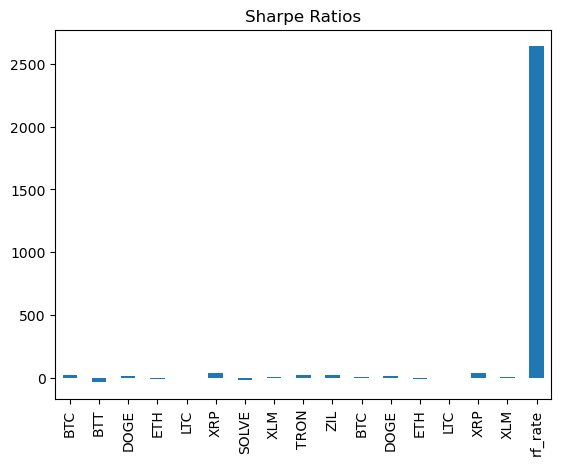

In [8]:
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How many smart investments did Harold make compared to risky investments? How many did you make?

### Which cryptos have been the smartest investment?